In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [110]:
def histog(arr):
    y = np.arange(arr.shape[0])
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            y[i] = x[i][j][0] + x[i][j][1] + x[i][j][2]
    y = np.array(y)
    plt.hist(y)
    

# 1. Считать цветное rgb изображение

In [48]:
x = cv2.imread('images/cat1.jpg', cv2.IMREAD_COLOR)
#cv2.imshow('cat', x)
#cv2.waitKey(0)

In [49]:
x.shape

(1200, 1600, 3)

In [53]:
np.sum([2, 3, 2])

7

# 2. Преобразовать изображение в градации серого

In [50]:
#gray = 0.216 * r + 0.715 * g + 0.072 * b

In [57]:
def monochrome(arr1):
    arr = arr1.copy()
    for i in range(arr.shape[0]):
        print(i)
        for j in range(arr.shape[1]):
            arr[i][j] = ([np.sum([arr[i][j][0] * 0.216, arr[i][j][1] * 0.715, arr[i][j][2] * 0.072]), np.sum([arr[i][j][0] * 0.216, arr[i][j][1] * 0.715, arr[i][j][2] * 0.072]), np.sum([arr[i][j][0] * 0.216, arr[i][j][1] * 0.715, arr[i][j][2] * 0.072])])
    return arr

In [58]:
x1 = monochrome(x)
cv2.imshow('cat', x1)
cv2.waitKey(0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

-1

# 3. Написать функцию реализации препарирования изображения

In [59]:
def fun(arr1, prepfun = cv2.threshold):
    arr = arr1.copy()
    arr = prepfun(arr,127,255,cv2.THRESH_BINARY_INV)
    return arr[1]

# 3. По гистограмме изображения определить значение порога яркостей, обеспечивающего оптимальное разделение объекта и фона. Осуществить пороговую обработку входного изображения с найденным пороговым значением

In [112]:
def my_otsu(arr1):
    arr = arr1.copy()
    yar = np.arange(arr.shape[0])
    for i in range(arr.shape[0]):
        print('i1:', i)
        for j in range(arr.shape[1]):
            yar[i] = np.mean([arr[i][j][0], arr[i][j][1], arr[i][j][2]])
    r = np.mean(yar)
    print(r)
    for i in range(arr.shape[0]):
        print('i2:', i)
        for j in range(arr.shape[1]):
            if np.sum([arr[i][j][0], arr[i][j][1], arr[i][j][2]]) < 150:
                arr[i][j][0] = 0
                arr[i][j][1] = 0
                arr[i][j][2] = 0
            else:
                arr[i][j][0] = 255
                arr[i][j][1] = 255
                arr[i][j][2] = 255
    return arr

In [113]:
x3 = my_otsu(x2)

i1: 0
i1: 1
i1: 2
i1: 3
i1: 4
i1: 5
i1: 6
i1: 7
i1: 8
i1: 9
i1: 10
i1: 11
i1: 12
i1: 13
i1: 14
i1: 15
i1: 16
i1: 17
i1: 18
i1: 19
i1: 20
i1: 21
i1: 22
i1: 23
i1: 24
i1: 25
i1: 26
i1: 27
i1: 28
i1: 29
i1: 30
i1: 31
i1: 32
i1: 33
i1: 34
i1: 35
i1: 36
i1: 37
i1: 38
i1: 39
i1: 40
i1: 41
i1: 42
i1: 43
i1: 44
i1: 45
i1: 46
i1: 47
i1: 48
i1: 49
i1: 50
i1: 51
i1: 52
i1: 53
i1: 54
i1: 55
i1: 56
i1: 57
i1: 58
i1: 59
i1: 60
i1: 61
i1: 62
i1: 63
i1: 64
i1: 65
i1: 66
i1: 67
i1: 68
i1: 69
i1: 70
i1: 71
i1: 72
i1: 73
i1: 74
i1: 75
i1: 76
i1: 77
i1: 78
i1: 79
i1: 80
i1: 81
i1: 82
i1: 83
i1: 84
i1: 85
i1: 86
i1: 87
i1: 88
i1: 89
i1: 90
i1: 91
i1: 92
i1: 93
i1: 94
i1: 95
i1: 96
i1: 97
i1: 98
i1: 99
i1: 100
i1: 101
i1: 102
i1: 103
i1: 104
i1: 105
i1: 106
i1: 107
i1: 108
i1: 109
i1: 110
i1: 111
i1: 112
i1: 113
i1: 114
i1: 115
i1: 116
i1: 117
i1: 118
i1: 119
i1: 120
i1: 121
i1: 122
i1: 123
i1: 124
i1: 125
i1: 126
i1: 127
i1: 128
i1: 129
i1: 130
i1: 131
i1: 132
i1: 133
i1: 134
i1: 135
i1: 136
i1: 137
i1: 13

i1: 1038
i1: 1039
i1: 1040
i1: 1041
i1: 1042
i1: 1043
i1: 1044
i1: 1045
i1: 1046
i1: 1047
i1: 1048
i1: 1049
i1: 1050
i1: 1051
i1: 1052
i1: 1053
i1: 1054
i1: 1055
i1: 1056
i1: 1057
i1: 1058
i1: 1059
i1: 1060
i1: 1061
i1: 1062
i1: 1063
i1: 1064
i1: 1065
i1: 1066
i1: 1067
i1: 1068
i1: 1069
i1: 1070
i1: 1071
i1: 1072
i1: 1073
i1: 1074
i1: 1075
i1: 1076
i1: 1077
i1: 1078
i1: 1079
i1: 1080
i1: 1081
i1: 1082
i1: 1083
i1: 1084
i1: 1085
i1: 1086
i1: 1087
i1: 1088
i1: 1089
i1: 1090
i1: 1091
i1: 1092
i1: 1093
i1: 1094
i1: 1095
i1: 1096
i1: 1097
i1: 1098
i1: 1099
i1: 1100
i1: 1101
i1: 1102
i1: 1103
i1: 1104
i1: 1105
i1: 1106
i1: 1107
i1: 1108
i1: 1109
i1: 1110
i1: 1111
i1: 1112
i1: 1113
i1: 1114
i1: 1115
i1: 1116
i1: 1117
i1: 1118
i1: 1119
i1: 1120
i1: 1121
i1: 1122
i1: 1123
i1: 1124
i1: 1125
i1: 1126
i1: 1127
i1: 1128
i1: 1129
i1: 1130
i1: 1131
i1: 1132
i1: 1133
i1: 1134
i1: 1135
i1: 1136
i1: 1137
i1: 1138
i1: 1139
i1: 1140
i1: 1141
i1: 1142
i1: 1143
i1: 1144
i1: 1145
i1: 1146
i1: 1147
i1: 1148
i

i2: 857
i2: 858
i2: 859
i2: 860
i2: 861
i2: 862
i2: 863
i2: 864
i2: 865
i2: 866
i2: 867
i2: 868
i2: 869
i2: 870
i2: 871
i2: 872
i2: 873
i2: 874
i2: 875
i2: 876
i2: 877
i2: 878
i2: 879
i2: 880
i2: 881
i2: 882
i2: 883
i2: 884
i2: 885
i2: 886
i2: 887
i2: 888
i2: 889
i2: 890
i2: 891
i2: 892
i2: 893
i2: 894
i2: 895
i2: 896
i2: 897
i2: 898
i2: 899
i2: 900
i2: 901
i2: 902
i2: 903
i2: 904
i2: 905
i2: 906
i2: 907
i2: 908
i2: 909
i2: 910
i2: 911
i2: 912
i2: 913
i2: 914
i2: 915
i2: 916
i2: 917
i2: 918
i2: 919
i2: 920
i2: 921
i2: 922
i2: 923
i2: 924
i2: 925
i2: 926
i2: 927
i2: 928
i2: 929
i2: 930
i2: 931
i2: 932
i2: 933
i2: 934
i2: 935
i2: 936
i2: 937
i2: 938
i2: 939
i2: 940
i2: 941
i2: 942
i2: 943
i2: 944
i2: 945
i2: 946
i2: 947
i2: 948
i2: 949
i2: 950
i2: 951
i2: 952
i2: 953
i2: 954
i2: 955
i2: 956
i2: 957
i2: 958
i2: 959
i2: 960
i2: 961
i2: 962
i2: 963
i2: 964
i2: 965
i2: 966
i2: 967
i2: 968
i2: 969
i2: 970
i2: 971
i2: 972
i2: 973
i2: 974
i2: 975
i2: 976
i2: 977
i2: 978
i2: 979
i2: 980
i2: 981


In [114]:
cv2.imshow('cat', x3)
cv2.waitKey(0)

-1

## 5. Сделать пороговую обработку методом Otsu (Функция OpenCV)

In [100]:
ret,thresh1 = cv2.threshold(x2,127,255,cv2.THRESH_BINARY)

In [101]:
cv2.imshow('cat', thresh1)
cv2.waitKey(0)

-1

## 6. Определить динамический диапазон входного изображения. Осуществить линейное контрастирование входного изображения в заданный динамический диапазон яркостей

In [182]:
def yark(arr1):
    yar = np.arange(arr1.shape[0])
    for i in range(arr1.shape[0]):
        print('ya: ', i)
        for j in range(arr1.shape[1]):
            yar[i] = np.mean([arr1[i][j][0], arr1[i][j][1], arr1[i][j][2]])
    return yar

In [154]:
for_6 = yark(x1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [156]:
x_min = for_6.min()
x_min

2

In [157]:
x_max = for_6.max()
x_max

229

In [167]:
a = 255/(x_max-x_min)
a

1.1233480176211454

In [168]:
b = (255*x_min)/(x_max-x_min)
b

2.246696035242291

In [164]:
def lincontr(arr1):
    arr = arr1.copy()
    for i in range(arr.shape[0]):
        print(i)
        for j in range(arr.shape[1]):
            for k in range(arr.shape[2]):
                arr[i][j][k] = arr[i][j][k]*a+b

    return arr

In [165]:
x4 = lincontr(x1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [166]:
cv2.imshow('cat', x4)
cv2.waitKey(0)

-1

# 7. Сделать эквализацию гистограммы изображения

C:\Users\rsoko\AppData\Local\Temp\ipykernel_3092\2643367957.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  y[i] = x[i][j][0] + x[i][j][1] + x[i][j][2]


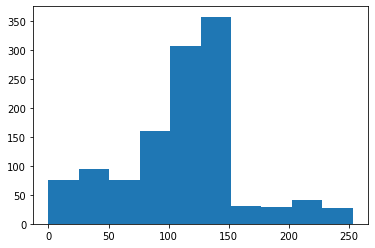

In [178]:
histog(x2)

In [183]:
def ecv(arr1):
    arr = arr1.copy()
    ya = yark(arr)
    for i in range(arr.shape[0]):
        print(i)
        for j in range(arr.shape[1]):
            if arr[i][j][0] + arr[i][j][1] + arr[i][j][2] < ya.mean():
                arr[i][j] = np.array([0, 0, 0])
            else:
                arr[i][j] = np.array([255, 255, 255])
    return arr        

In [184]:
x5 = ecv(x2)

ya:  0
ya:  1
ya:  2
ya:  3
ya:  4
ya:  5
ya:  6
ya:  7
ya:  8
ya:  9
ya:  10
ya:  11
ya:  12
ya:  13
ya:  14
ya:  15
ya:  16
ya:  17
ya:  18
ya:  19
ya:  20
ya:  21
ya:  22
ya:  23
ya:  24
ya:  25
ya:  26
ya:  27
ya:  28
ya:  29
ya:  30
ya:  31
ya:  32
ya:  33
ya:  34
ya:  35
ya:  36
ya:  37
ya:  38
ya:  39
ya:  40
ya:  41
ya:  42
ya:  43
ya:  44
ya:  45
ya:  46
ya:  47
ya:  48
ya:  49
ya:  50
ya:  51
ya:  52
ya:  53
ya:  54
ya:  55
ya:  56
ya:  57
ya:  58
ya:  59
ya:  60
ya:  61
ya:  62
ya:  63
ya:  64
ya:  65
ya:  66
ya:  67
ya:  68
ya:  69
ya:  70
ya:  71
ya:  72
ya:  73
ya:  74
ya:  75
ya:  76
ya:  77
ya:  78
ya:  79
ya:  80
ya:  81
ya:  82
ya:  83
ya:  84
ya:  85
ya:  86
ya:  87
ya:  88
ya:  89
ya:  90
ya:  91
ya:  92
ya:  93
ya:  94
ya:  95
ya:  96
ya:  97
ya:  98
ya:  99
ya:  100
ya:  101
ya:  102
ya:  103
ya:  104
ya:  105
ya:  106
ya:  107
ya:  108
ya:  109
ya:  110
ya:  111
ya:  112
ya:  113
ya:  114
ya:  115
ya:  116
ya:  117
ya:  118
ya:  119
ya:  120
ya:  121
ya:  122
ya:

ya:  931
ya:  932
ya:  933
ya:  934
ya:  935
ya:  936
ya:  937
ya:  938
ya:  939
ya:  940
ya:  941
ya:  942
ya:  943
ya:  944
ya:  945
ya:  946
ya:  947
ya:  948
ya:  949
ya:  950
ya:  951
ya:  952
ya:  953
ya:  954
ya:  955
ya:  956
ya:  957
ya:  958
ya:  959
ya:  960
ya:  961
ya:  962
ya:  963
ya:  964
ya:  965
ya:  966
ya:  967
ya:  968
ya:  969
ya:  970
ya:  971
ya:  972
ya:  973
ya:  974
ya:  975
ya:  976
ya:  977
ya:  978
ya:  979
ya:  980
ya:  981
ya:  982
ya:  983
ya:  984
ya:  985
ya:  986
ya:  987
ya:  988
ya:  989
ya:  990
ya:  991
ya:  992
ya:  993
ya:  994
ya:  995
ya:  996
ya:  997
ya:  998
ya:  999
ya:  1000
ya:  1001
ya:  1002
ya:  1003
ya:  1004
ya:  1005
ya:  1006
ya:  1007
ya:  1008
ya:  1009
ya:  1010
ya:  1011
ya:  1012
ya:  1013
ya:  1014
ya:  1015
ya:  1016
ya:  1017
ya:  1018
ya:  1019
ya:  1020
ya:  1021
ya:  1022
ya:  1023
ya:  1024
ya:  1025
ya:  1026
ya:  1027
ya:  1028
ya:  1029
ya:  1030
ya:  1031
ya:  1032
ya:  1033
ya:  1034
ya:  1035
ya:  1036
ya:  1037

C:\Users\rsoko\AppData\Local\Temp\ipykernel_3092\4248854007.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  if arr[i][j][0] + arr[i][j][1] + arr[i][j][2] < ya.mean():


6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
28

In [186]:
cv2.imshow('cat', x5)
cv2.waitKey(0)

-1

# 8. Сделать эквализацию методом CLAHE (Функция OpenCV)

In [175]:
image_bw = cv2.cvtColor(x2, cv2.COLOR_BGR2GRAY)
image_bw

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [174]:
clahe = cv2.createCLAHE(clipLimit = 5)
final_img = clahe.apply(image_bw)

In [177]:
cv2.imshow("CLAHE image", final_img)
cv2.waitKey(0)

-1

# 9.  Осуществить препарирование изображения с заданной препарирующей функцией

In [187]:
x2 = fun(x1)

In [188]:
cv2.imshow('cat', x2)
cv2.waitKey(0)

-1